# Linear regression model - Batch Gradient Descent
## happiness = f(GDP-per-capita, freedom-coefficient) - by my code and by tool

In [1]:
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.linear_model
from BGD import BGD, utils

#### 1. Load data and verify liniarity

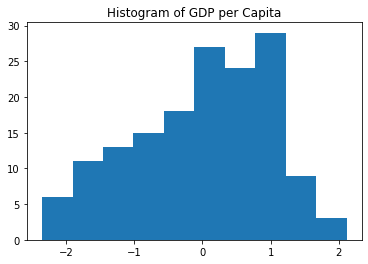

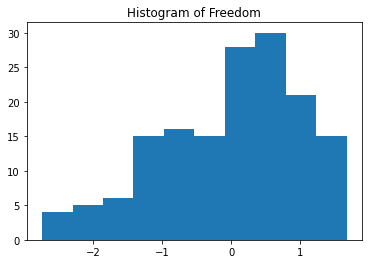

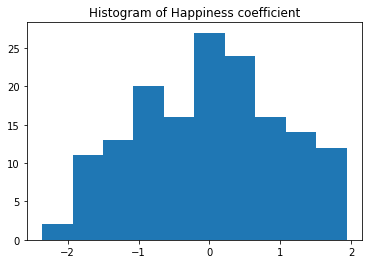

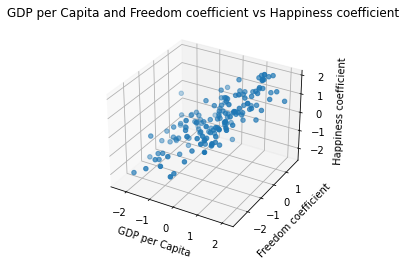

In [2]:
inputs = [
    utils.statistical_normalisation(utils.get_data('data/world-happiness-report-2017.csv', 'Economy.GDP.per.Capita')),
    utils.statistical_normalisation(utils.get_data('data/world-happiness-report-2017.csv', 'Freedom'))]

outputs = utils.get_data('data/world-happiness-report-2017.csv', 'Happiness.Score')
outputs = utils.statistical_normalisation(outputs)

utils.plot_data_histograms(inputs[0], 'GDP per Capita')
utils.plot_data_histograms(inputs[1], 'Freedom')
utils.plot_data_histograms(outputs, 'Happiness coefficient')

plt.figure()
ax_by_tool = plt.axes(projection='3d')

ax_by_tool.scatter(inputs[0], inputs[1], outputs)
ax_by_tool.set_xlabel('GDP per Capita')
ax_by_tool.set_ylabel('Freedom coefficient')
ax_by_tool.set_zlabel('Happiness coefficient')
ax_by_tool.set_title("GDP per Capita and Freedom coefficient vs Happiness coefficient")
plt.show()

#### 2. Split data into training and validation subsets

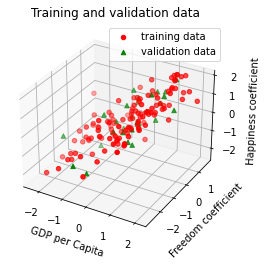

In [3]:
train_inputs, train_outputs, validation_inputs, validation_outputs = utils.split_data_into_training_and_validation(
    inputs, outputs, 0.8)

plt.figure()
ax_by_tool = plt.axes(projection='3d')
ax_by_tool.scatter(train_inputs[0], train_inputs[1], train_outputs, c='r', marker='o', label='training data')
ax_by_tool.scatter(validation_inputs[0], validation_inputs[1], validation_outputs, c='g', marker='^',
                   label='validation data')
ax_by_tool.set_title("Training and validation data")
ax_by_tool.set_xlabel('GDP per Capita')
ax_by_tool.set_ylabel('Freedom coefficient')
ax_by_tool.set_zlabel('Happiness coefficient')
ax_by_tool.legend()
plt.show()

#### 3. Init and train a linear regression model

In [4]:
X = [[el1, el2] for el1, el2 in zip(train_inputs[0], train_inputs[1])]

regressor = BGD.MyBGDRegressor()
regressor.fit(X, train_outputs, learning_rate=0.001, no_epochs=1000)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('The learnt model - my code:')
print('f(x1, x2) = ', w0, '+', w1, '* x1 +', w2, '* x2')

regressor_by_tool = sklearn.linear_model.SGDRegressor(alpha=0.001, max_iter=1000)
regressor_by_tool.fit(X, train_outputs)
w0, w1, w2 = regressor_by_tool.intercept_[0], regressor_by_tool.coef_[0], regressor_by_tool.coef_[1]
print('The learnt model - by tool:')
print('f(x1, x2) = ', w0, '+', w1, '* x1 +', w2, '* x2')

The learnt model - my code:
f(x1, x2) =  -0.023743150082824384 + 0.0006519143786243982 * x1 + 0.0004412058781855815 * x2
The learnt model - by tool:
f(x1, x2) =  -0.0012310490761200746 + 0.6825083896830523 * x1 + 0.32031673287062556 * x2


#### 4. Use the learnt model to predict new inputs

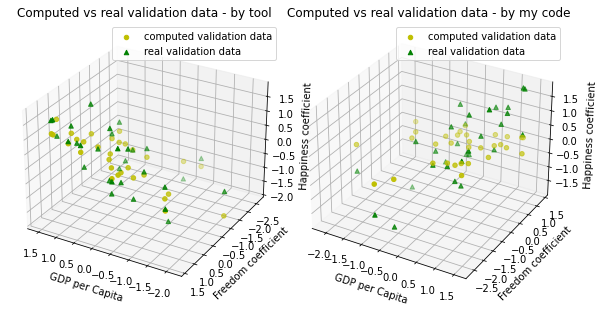

In [5]:
computed_validation_outputs_my_code = regressor.predict(
    [[el1, el2] for el1, el2 in zip(validation_inputs[0], validation_inputs[1])])
computed_validation_outputs_tool = regressor_by_tool.predict([[el1, el2] for el1, el2 in zip(validation_inputs[0], validation_inputs[1])])

fig = plt.figure(figsize=(12, 10))

ax_by_tool = fig.add_subplot(132, projection='3d')
ax_by_tool.scatter(validation_inputs[0], validation_inputs[1], computed_validation_outputs_my_code, c='y', marker='o',
                   label='computed validation data')
ax_by_tool.scatter(validation_inputs[0], validation_inputs[1], validation_outputs, c='g', marker='^',
                   label='real validation data')
ax_by_tool.set_title("Computed vs real validation data - by my code")
ax_by_tool.set_xlabel('GDP per Capita')
ax_by_tool.set_ylabel('Freedom coefficient')
ax_by_tool.set_zlabel('Happiness coefficient')
ax_by_tool.legend()

ax_by_tool = fig.add_subplot(131, projection='3d')
ax_by_tool.scatter(validation_inputs[0], validation_inputs[1], computed_validation_outputs_tool, c='y', marker='o', label='computed validation data')
ax_by_tool.scatter(validation_inputs[0], validation_inputs[1], validation_outputs, c='g', marker='^', label='real validation data')
ax_by_tool.set_title("Computed vs real validation data - by tool")
ax_by_tool.set_xlabel('GDP per Capita')
ax_by_tool.set_ylabel('Freedom coefficient')
ax_by_tool.set_zlabel('Happiness coefficient')
ax_by_tool.legend()
ax_by_tool.view_init(28, 120)

fig.tight_layout()

#### 5. Performance evaluation

In [6]:
mae = sklearn.metrics.mean_absolute_error(validation_outputs, computed_validation_outputs_my_code)
rmse = sklearn.metrics.mean_squared_error(validation_outputs, computed_validation_outputs_my_code)
print('Prediction error - regression by my code')
print('mean absolute error:', mae)
print('root mean squared error:', rmse)

mae = sklearn.metrics.mean_absolute_error(validation_outputs, computed_validation_outputs_tool)
rmse = sklearn.metrics.mean_squared_error(validation_outputs, computed_validation_outputs_tool)
print('Prediction error - regression by tool')
print('mean absolute error:', mae)
print('root mean squared error:', rmse)

Prediction error - regression by my code
mean absolute error: 0.7952493605233897
root mean squared error: 0.8913464409913007
Prediction error - regression by tool
mean absolute error: 0.48606243956541884
root mean squared error: 0.33995086637120914
